# XOR Gate Model with Neural Nets
by [Andreas Schneider](mailto:Andreas.Schneider@hs-heilbronn.de) and [Nicolaj Stache](mailto:Nicolaj.Stache@hs-heilbronn.de), Heilbronn University of Applied Sciences

In this notebook, we create a neural network which models the function of an XOR gate.

## Network Architecture
###### Notice how the bias is introduced here!
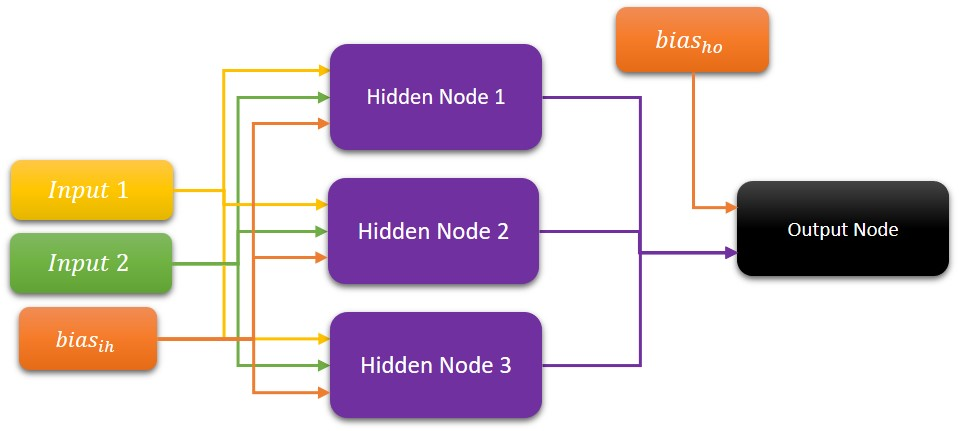

## Why do we need a BIAS?

To really understand the bias we need a simple example.
Let's consider we want a neural network, which is able to model a simple straight line.
In order to this there are two possible functions:  
1. $ y = ax $
2. $ y = ax + b $  

The $[+ b]$ term describes the offset of the line.

**This is exactly what we do when we introduce the bias. We want to give the neural network the ability to offset e.g. the regression line. This gives us an additional degree of freedom and increases the capability of the model also in the case of other non-linear models.**

For simplicity, we treat the bias here as an additional input which is set to constantly 1. By multiplying it with the input weight of the neuron, the result can take any value. Additionally, it is required to feed the bias into the network separately in each layer (as shown in the image above, where the bias is also connected to the output neuron). 

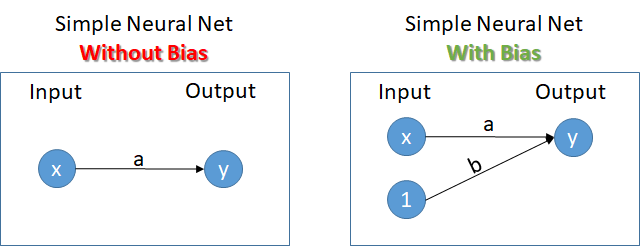


##### Here are examples to illustrate the increased flexibility to fit a line by using a bias. 
In the example below you can also check how plots are created by python in Jupyter Notebook.

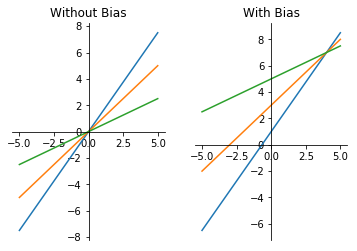

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# define the x range
x = np.linspace(-5,5,2)

# define the weight a
a1 = 1.5
a2 = 1
a3 = 0.5
# define the weight b
b1 = 1
b2 = 3
b3 = 5

y_without_bias1 = a1*x
y_without_bias2 = a2*x
y_without_bias3 = a3*x
y_with_bias1 = a1*x+b1
y_with_bias2 = a2*x+b2
y_with_bias3 = a3*x+b3

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Without Bias')
ax.plot(x, y_without_bias1)
ax.plot(x, y_without_bias2)
ax.plot(x, y_without_bias3)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')


ax = fig.add_subplot(1, 2, 2)
ax.set_title('With Bias')
ax.plot(x, y_with_bias1)
ax.plot(x, y_with_bias2)
ax.plot(x, y_with_bias3)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

---

# Example: Model an XOR-Gate with a neural network

## Training data

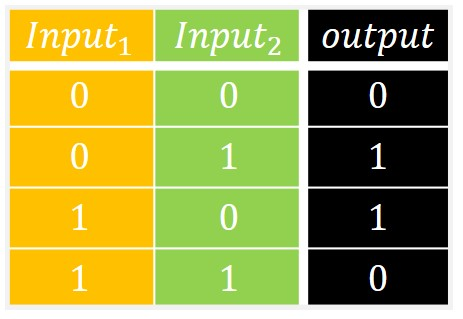

## Activation Function:

Sigmoid as in the Gardening Example.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" width="600" align="center" />  
 
**Quelle:** https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg

## Let's start step by step:


### 1. Initalize 

In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Input Values
x = np.array([[1.0, 1.0]])
print("Input Vector without Bias:  \n",x)
# Target Result
target = np.array([[0.0]])

# Add Bias to Input Vector
x = np.insert(x, -1, 1, axis=1)
print("Input Vector with Bias:  \n",x)

weights_input_hidden = np.array([[0.8, 0.4, 0.3],
                                 [0.2, 0.9, 0.5],
                                 [0.1, 0.2, 0.3]])

print("Weights - Input to Hidden:  \n",weights_input_hidden)
    
weights_hidden_output = np.array([[0.3, 0.5, 0.9, 0.1]]).transpose()
print("Weights - Hidden to Output:  \n",weights_hidden_output)

Input Vector without Bias:  
 [[ 1.  1.]]
Input Vector with Bias:  
 [[ 1.  1.  1.]]
Weights - Input to Hidden:  
 [[ 0.8  0.4  0.3]
 [ 0.2  0.9  0.5]
 [ 0.1  0.2  0.3]]
Weights - Hidden to Output:  
 [[ 0.3]
 [ 0.5]
 [ 0.9]
 [ 0.1]]


### 2. Compute the forward pass 
- First, we compute the weighted sum of inputs (note: bias is considered as an additional input) $h_{in} = \sum\limits_{i} w_i x_i$
- Second, we compute the output $f(h_{out}) = sigmoid(h_{in})$  
- Thrid, we add a Bias Input to the output layer with np.insert()
- Fourth, we compute the input to the output node, which is the weighted sum of the hidden outputs $f(h_{out})$
- Finally, we compute the output of the network by taken the sigmoid of the previous result

In [3]:
## Set the precision of the output
np.set_printoptions(precision=4)

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
print('hidden layer input:  ', hidden_layer_input,'\n')

hidden_layer_output = sigmoid(hidden_layer_input)
print('hidden layer output (no Bias): ', hidden_layer_output)

# Add Bias to Output Layer
hidden_layer_output = np.insert(hidden_layer_output, 3, 1, axis=1)
print('hidden layer output (added Bias): ', hidden_layer_output,'\n')

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
print('output layer input:  ', output_layer_in)

output = sigmoid(output_layer_in)
print('output layer output: ', output)

hidden layer input:   [[ 1.1  1.5  1.1]] 

hidden layer output (no Bias):  [[ 0.7503  0.8176  0.7503]]
hidden layer output (added Bias):  [[ 0.7503  0.8176  0.7503  1.    ]] 

output layer input:   [[ 1.4091]]
output layer output:  [[ 0.8036]]


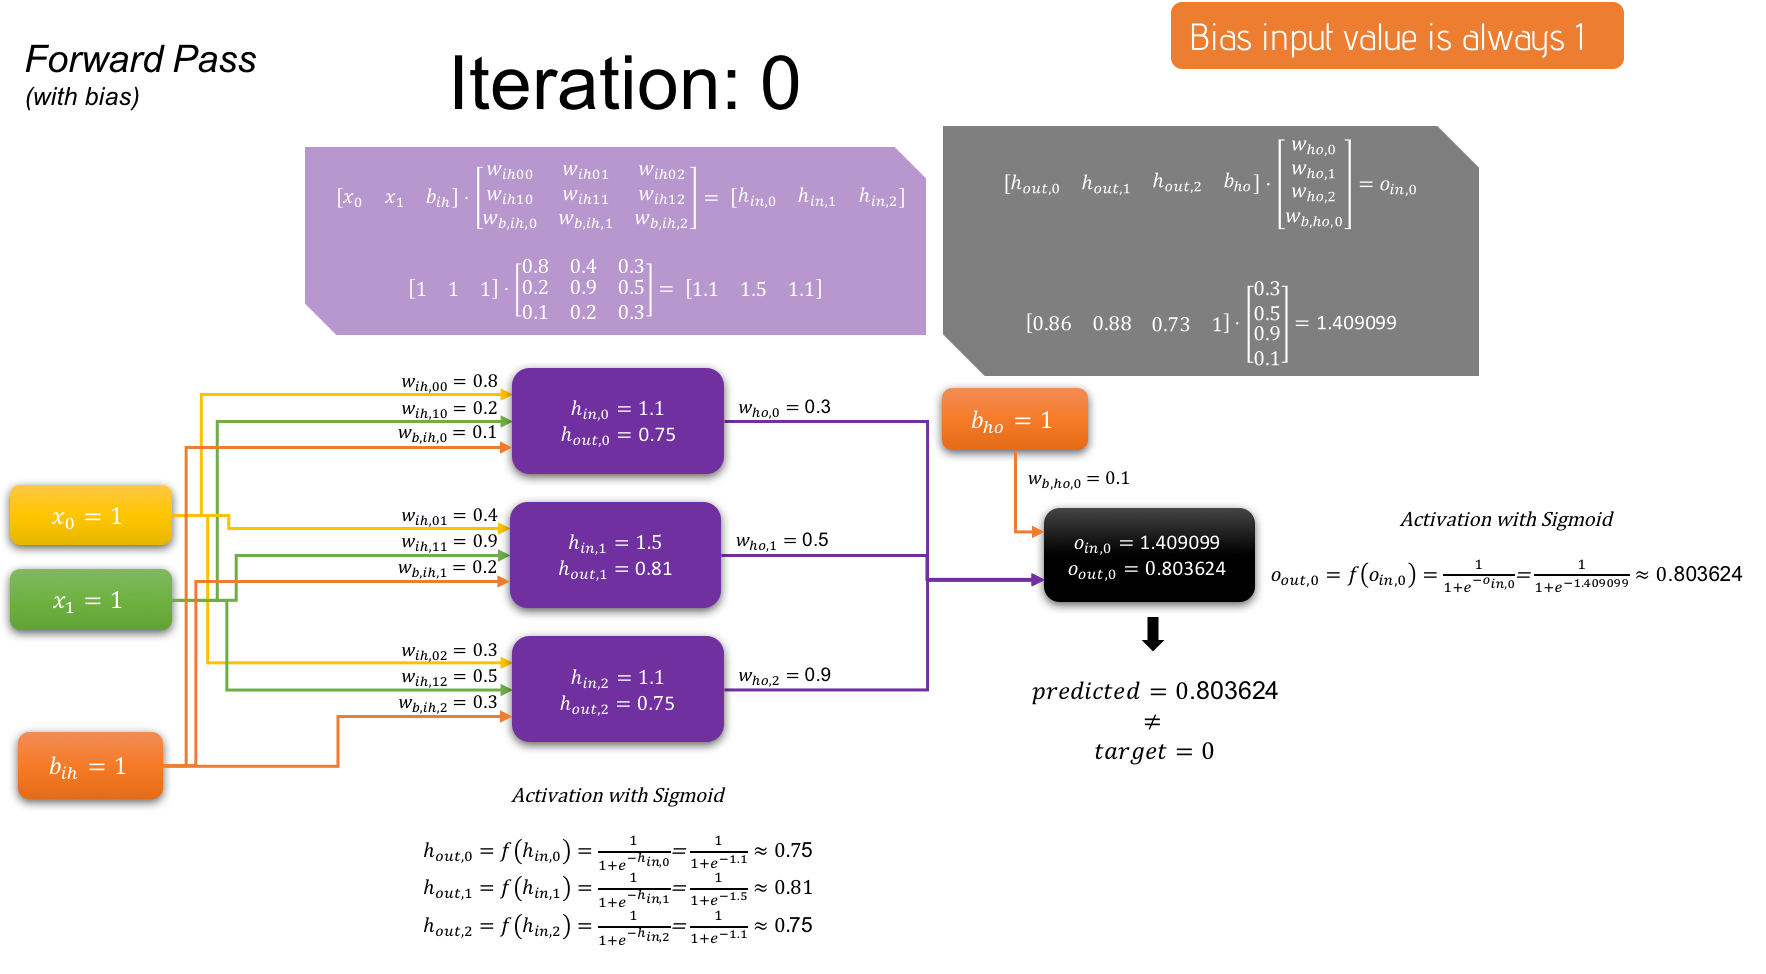

### 3. Compute the backward pass

In [4]:
np.set_printoptions(8)
learnrate = 0.5

# Calculate output error
error = target - output
# Calculate error term for output layer
output_error_term = error * sigmoid_prime(output_layer_in)
print('output_error_term: \n', output_error_term, '\n')

# Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output.transpose()
print('delta_w hidden to output: \n', delta_w_h_o, '\n')

weights_hidden_output_new = weights_hidden_output + delta_w_h_o 
print('updated weights hidden to output: \n', weights_hidden_output_new, '\n')

# Calculate error term for hidden layer
hidden_error_term = np.dot(output_error_term, weights_hidden_output.transpose())[0][0:3] * sigmoid_prime(hidden_layer_input)
print('hidden_error_term: \n', hidden_error_term, '\n')

# Calculate change in weights for input layer to hidden layer

delta_w_i_h = learnrate * hidden_error_term * x
print('delta_w hidden to input: \n', delta_w_i_h, '\n')

weights_input_hidden_new = weights_input_hidden + delta_w_i_h
print('updated weights input to hidden: \n', weights_input_hidden_new, '\n')

print('Change in weights for hidden layer to output layer: \n', delta_w_h_o, '\n')
print('Change in weights for input layer to hidden layer:\n', delta_w_i_h, '\n')

output_error_term: 
 [[-0.12682193]] 

delta_w hidden to output: 
 [[-0.04757472]
 [-0.05184319]
 [-0.04757472]
 [-0.06341097]] 

updated weights hidden to output: 
 [[ 0.25242528]
 [ 0.44815681]
 [ 0.85242528]
 [ 0.03658903]] 

hidden_error_term: 
 [[-0.00712878 -0.00945752 -0.02138635]] 

delta_w hidden to input: 
 [[-0.00356439 -0.00472876 -0.01069317]] 

updated weights input to hidden: 
 [[ 0.79643561  0.39527124  0.28930683]
 [ 0.19643561  0.89527124  0.48930683]
 [ 0.09643561  0.19527124  0.28930683]] 

Change in weights for hidden layer to output layer: 
 [[-0.04757472]
 [-0.05184319]
 [-0.04757472]
 [-0.06341097]] 

Change in weights for input layer to hidden layer:
 [[-0.00356439 -0.00472876 -0.01069317]] 



### Compare the Result with the graph below
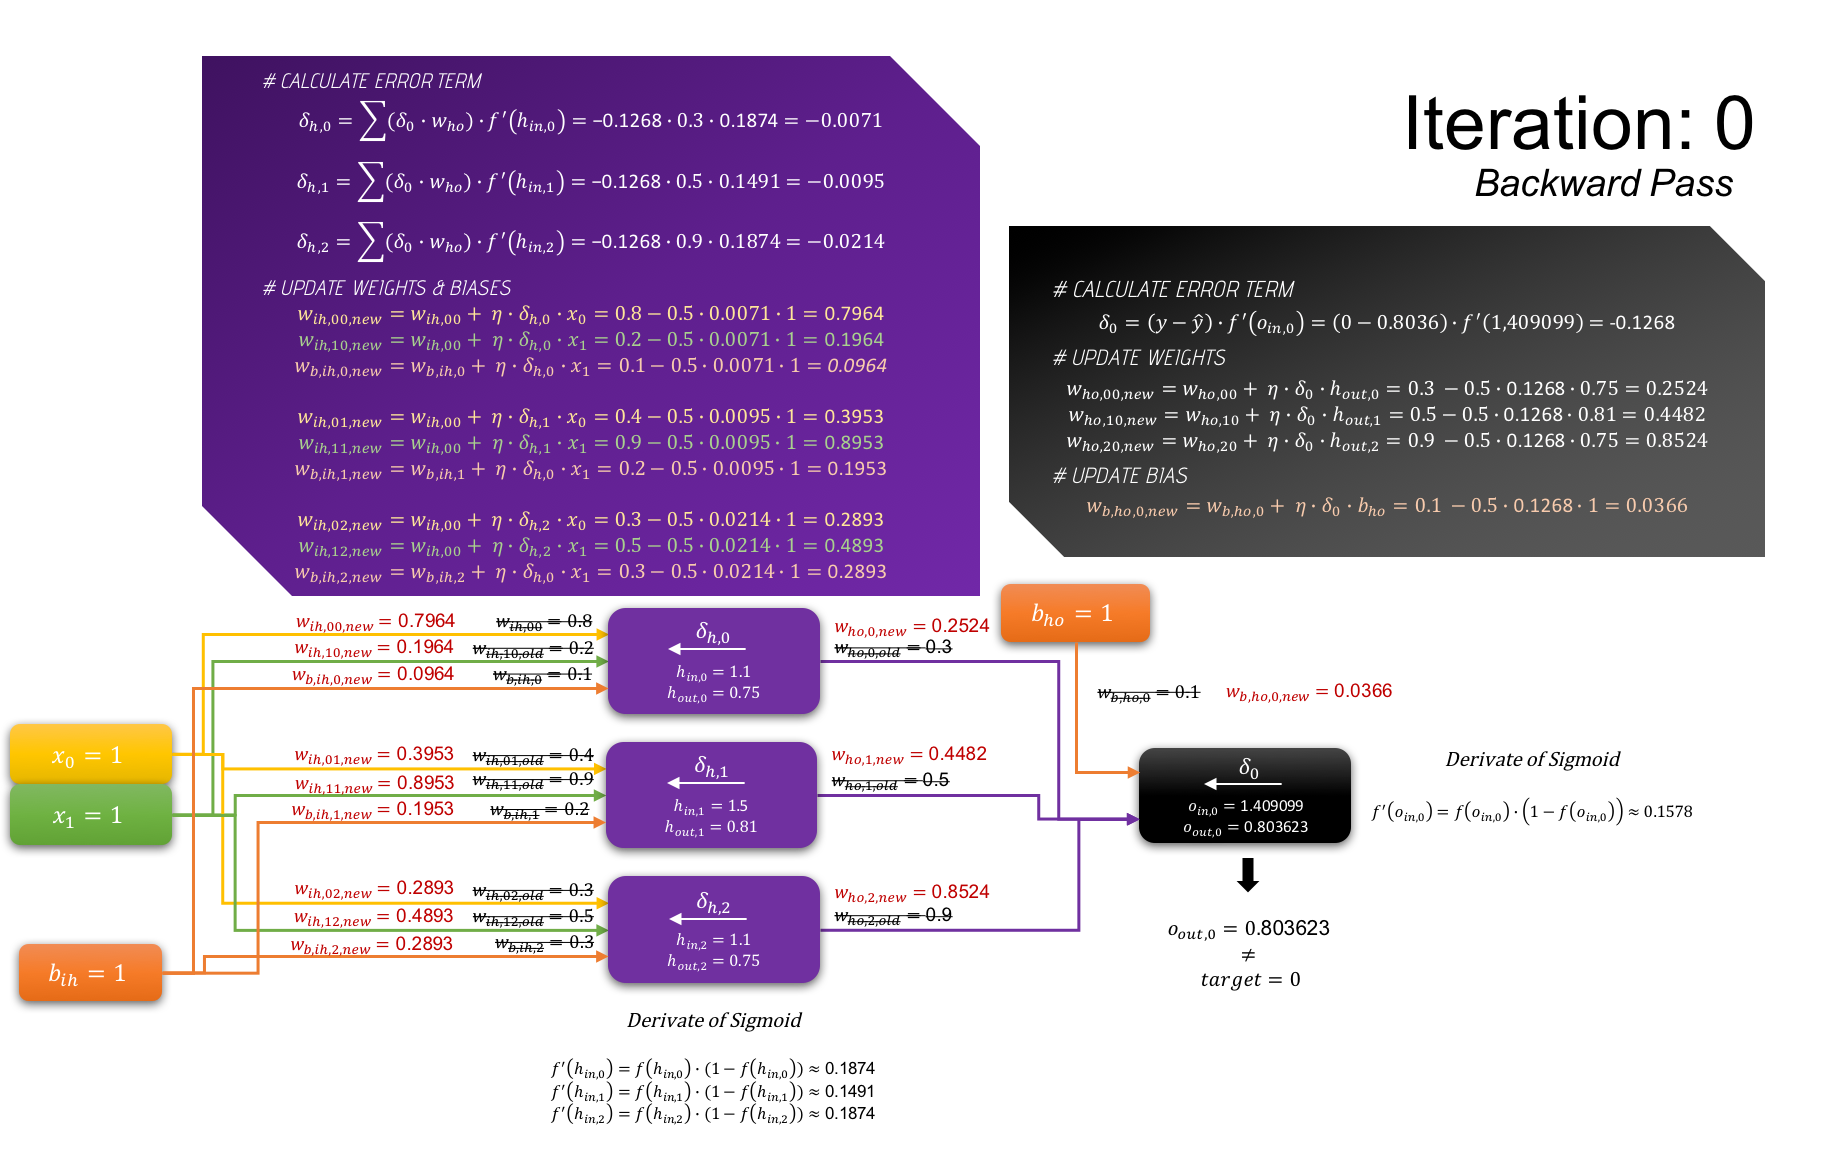

### 4. Forward Pass again

In [5]:
## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden_new)
print('hidden layer input:  ', hidden_layer_input)

hidden_layer_output = sigmoid(hidden_layer_input)
print('hidden layer output: ', hidden_layer_output,'\n')

hidden_layer_output = np.insert(hidden_layer_output, 3, 1, axis=1)
print('hidden layer output: ', hidden_layer_output,'\n')

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output_new)
print('output layer input:  ', output_layer_in)

output = sigmoid(output_layer_in)
print('output layer output: ', output)

hidden layer input:   [[ 1.08930683  1.48581372  1.06792048]]
hidden layer output:  [[ 0.74825117  0.8154491   0.74420125]] 

hidden layer output:  [[ 0.74825117  0.8154491   0.74420125  1.        ]] 

output layer input:   [[ 1.22529157]]
output layer output:  [[ 0.77299343]]


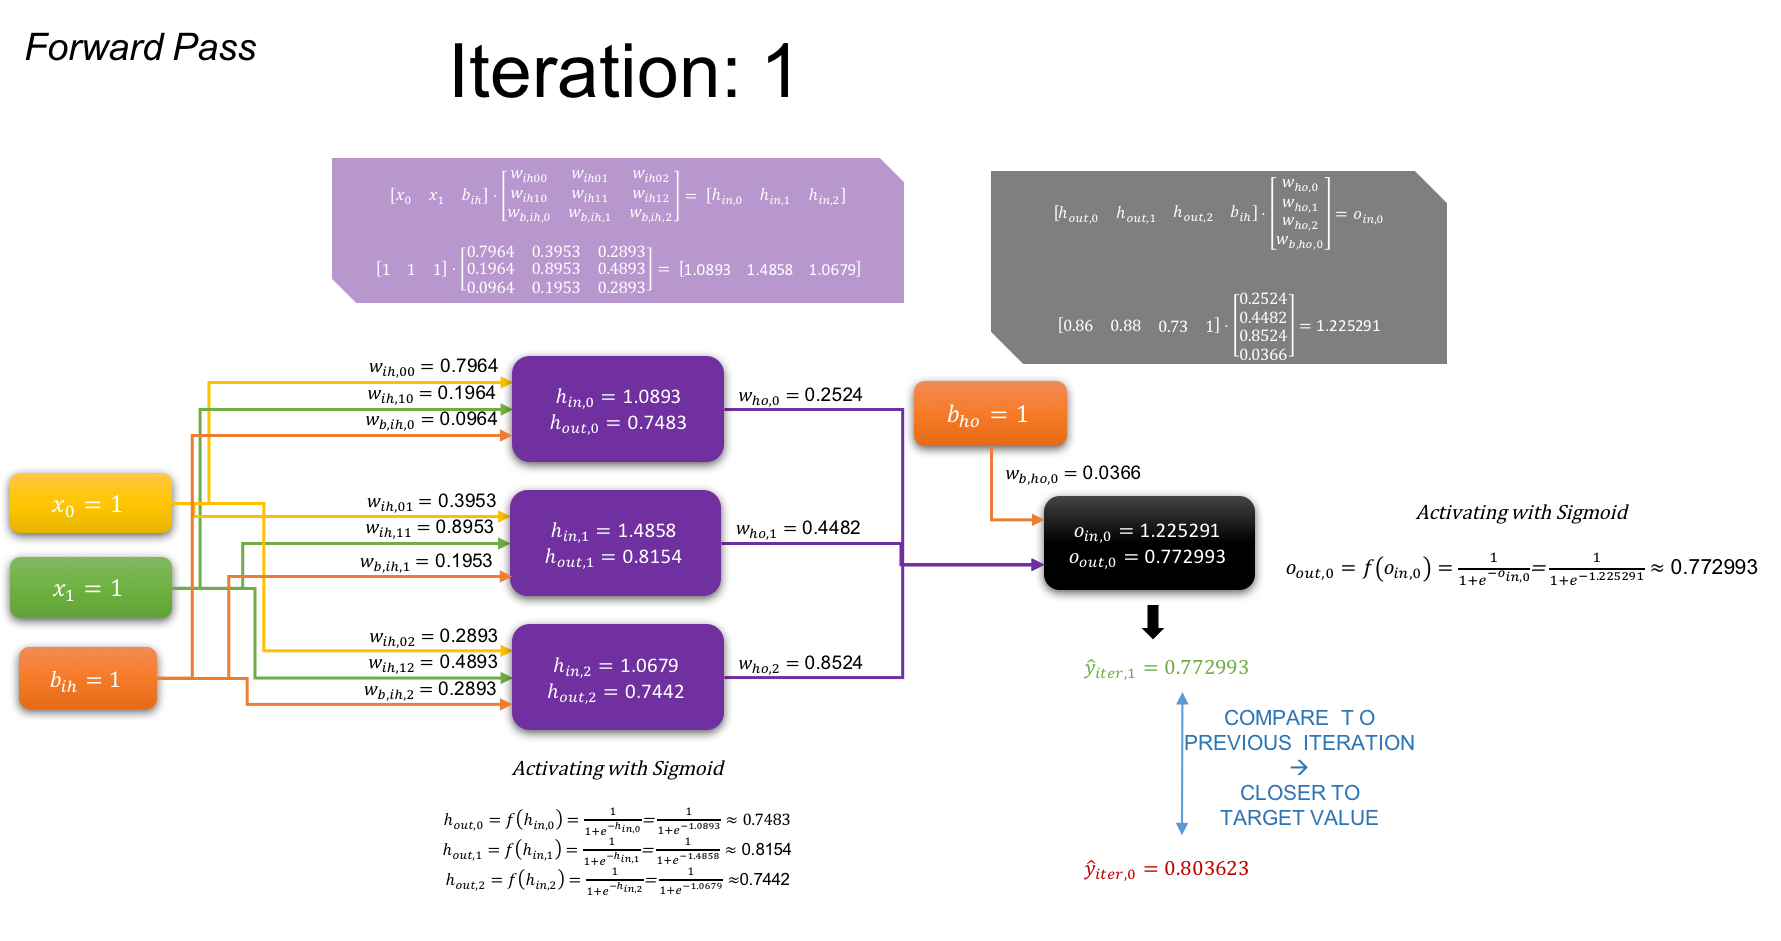

For an efficient training of the neural network, forward passes and backpropagation need to be done repeatedly, while considering all of the training data. 

# Now we write down the complete network in one block. 
> **TASK:** Fill in the TODO's

In [6]:
import numpy as np
np.set_printoptions(2, suppress=True)
features = np.array( [[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
targets = np.array([[0], 
                    [1], 
                    [1], 
                    [0]])

print('Features:  \n', features, '\n')
print('Targets:  \n', targets, '\n')

# Add Bias
features = np.insert(features, 2, 1, axis=1)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """
    Calculate derivative of sigmoid
    """
    return sigmoid(x) * (1 - sigmoid(x))

# Hyperparameters
epochs = 10000
learnrate = 0.3
# Save the number of training samples
n_records, n_features = features.shape

# Initialize weights
def fixedWeightInitializationFromExampleAbove():
    weights_input_hidden = np.array([[0.8, 0.4, 0.3],
                                     [0.2, 0.9, 0.5],
                                     [0.1, 0.2, 0.3]])
    
    weights_hidden_output = np.array([[0.3, 0.5, 0.9, 0.1]]).transpose()

    return weights_input_hidden, weights_hidden_output

weights_input_hidden, weights_hidden_output = fixedWeightInitializationFromExampleAbove()

print('weights_input_hidden: ', weights_input_hidden, '\n')
print('weights_hidden_output: ', weights_hidden_output, '\n')

def forward_pass(inputs):
        hidden_input = np.dot(inputs, weights_input_hidden)
        hidden_output = sigmoid(hidden_input) 
        hidden_output = np.insert(hidden_output, 3, 1, axis=1) 
        output_input = np.dot(hidden_output, weights_hidden_output)
        output_output = sigmoid(output_input)
        return hidden_input, hidden_output, output_input, output_output

def backward_pass(target, hidden_input, output_input, output_output):    
        error = target - output_output
        output_error_term = error * sigmoid_prime(output_input)
        hidden_error = output_error_term * weights_hidden_output[0:3]
        hidden_error_term = hidden_error * sigmoid_prime(hidden_input).transpose()
        return hidden_error_term, output_error_term
    
for e in range(epochs):
    if e % (epochs / 10) == 0:      
        _, _, _, output_output = forward_pass(features)
        print("________________________________________________________________")
        loss = np.mean((np.subtract(targets, output_output) ** 2))
        print("Interation:", e, ", Current Loss:",loss)
    
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    
    for x, y in zip(features, targets):
        x=np.expand_dims(x,0)
        y=np.expand_dims(y,1)

        # TODO: Forward Pass        
        hidden_input, hidden_output, output_input, output_output = forward_pass(x)  
        
        # TODO: Backward Pass
        hidden_error_term, output_error_term = backward_pass(y, hidden_input, output_input, output_output)

        # TODO: Delta for Weight Update
        del_w_hidden_output += output_error_term * hidden_output.transpose()
        del_w_input_hidden += x.transpose() * hidden_error_term.transpose()
        
    # Weight Update
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records
    

# Test the network
print()
print("Final Test")
print("________________________________________________________________")
_, _, _, output_output = forward_pass(features)
loss = np.mean((np.subtract(targets, output_output) ** 2))
print("Interation:", epochs, ", Current Loss:",loss)

np.set_printoptions(precision=2)
print()
print('weights_input_hidden: \n', weights_input_hidden, '\n')
print('weights_hidden_output: \n', weights_hidden_output, '\n')

print('predicted output ', output_output)
print("target output:\t", targets)

Features:  
 [[0 0]
 [0 1]
 [1 0]
 [1 1]] 

Targets:  
 [[0]
 [1]
 [1]
 [0]] 

weights_input_hidden:  [[ 0.8  0.4  0.3]
 [ 0.2  0.9  0.5]
 [ 0.1  0.2  0.3]] 

weights_hidden_output:  [[ 0.3]
 [ 0.5]
 [ 0.9]
 [ 0.1]] 

________________________________________________________________
Interation: 0 , Current Loss: 0.323690339034
________________________________________________________________
Interation: 1000 , Current Loss: 0.248888594681
________________________________________________________________
Interation: 2000 , Current Loss: 0.245950948917
________________________________________________________________
Interation: 3000 , Current Loss: 0.234530537129
________________________________________________________________
Interation: 4000 , Current Loss: 0.20544210701
________________________________________________________________
Interation: 5000 , Current Loss: 0.166113351627
________________________________________________________________
Interation: 6000 , Current Loss: 0.07980834